# Examples of using eplda

Here are some simple examples. We will need Jupyter Notebook to run this.

This notebook demonstrates how to use the eplda library to analyze English Premier League data. Before starting, let's ensure we have Python and Jupyter Notebook installed.

```
pip install ipython jupyter
```

## Installing the libraries needed

Now please install the libraries that we need for this, they are listed in the file [requirements.txt](requirements.txt).

To do that run the code in the following cell:

In [1]:
# Make sure you're in the right environment
import os
print(os.environ['CONDA_DEFAULT_ENV'])

epltest


In [2]:
# If something doesn't work right, please install the dependencies manually.
# %pip install -r requirements.txt

## Examples

In [3]:
# Import libraries
import pandas as pd
import matplotlib as plt
import numpy as np
from eplda.api import EPLAPI

In [4]:
# # If you haven't installed matplotlib yet, run this cell:
# %pip install matplotlib

In order to use most of the functions, it is very important to get the season id. We can do that it by passing the specified ``season_label`` into ``get_season_id()``. Let's take the ``season_label="2024/25"`` as an example. 

In [5]:
epl = EPLAPI()
season_24_25 = epl.get_season_id(season_label="2024/25")
season_24_25

'719'

If we leave the ``season_label`` empty, it will automatic return the season id of the current season. But it's still highly recommended to specify the season_label to avoid potential mistakes. 

(e.g. if we run the cell below in the end of 2026, it would actually return the season id of 2026/2027 season.)

In [6]:
season_25_26 = epl.get_season_id()
season_25_26

'777'

## Club Data

### Available Data Types
The library offers various methods to analyze club data:

1. `get_club_tables()` - League standings and points
2. `get_club_ids()` - Club identification numbers
3. `get_club_info()` - Detailed club information
4. `get_club_rankings()` - Performance rankings by specific metrics
5. `get_club_stats()` - Detailed statistics for individual clubs

**Note**: Most methods support both DataFrame ('df') and JSON output formats through the `output` parameter.

The most crucial data about clubs are probably the points. We can use ``get_club_tables()`` to get the tables.

In [7]:
current_table = epl.get_club_tables(season_id = season_24_25)
current_table

,Position,Club,Club ID,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points
0,1,Liverpool,10,38,25,9,4,86,41,45,84
1,2,Arsenal,1,38,20,14,4,69,34,35,74
2,3,Manchester City,11,38,21,8,9,72,44,28,71
3,4,Chelsea,4,38,20,9,9,64,43,21,69
4,5,Newcastle United,23,38,20,6,12,68,47,21,66
5,6,Aston Villa,2,38,19,9,10,58,51,7,66
6,7,Nottingham Forest,15,38,19,8,11,58,46,12,65
7,8,Brighton & Hove Albion,131,38,16,13,9,66,59,7,61
8,9,Bournemouth,127,38,15,11,12,58,46,12,56
9,10,Brentford,130,38,16,8,14,66,57,9,56


As mentioned above, we can specify ``output = "json"`` to return results as JSON.

In [8]:
current_table = epl.get_club_tables(season_id = season_24_25, output = "json")
current_table

[{'Position': 1,
  'Club': 'Liverpool',
  'Club ID': '10',
  'Played': 38,
  'Won': 25,
  'Drawn': 9,
  'Lost': 4,
  'Goals For': 86,
  'Goals Against': 41,
  'Goal Difference': 45,
  'Points': 84},
 {'Position': 2,
  'Club': 'Arsenal',
  'Club ID': '1',
  'Played': 38,
  'Won': 20,
  'Drawn': 14,
  'Lost': 4,
  'Goals For': 69,
  'Goals Against': 34,
  'Goal Difference': 35,
  'Points': 74},
 {'Position': 3,
  'Club': 'Manchester City',
  'Club ID': '11',
  'Played': 38,
  'Won': 21,
  'Drawn': 8,
  'Lost': 9,
  'Goals For': 72,
  'Goals Against': 44,
  'Goal Difference': 28,
  'Points': 71},
 {'Position': 4,
  'Club': 'Chelsea',
  'Club ID': '4',
  'Played': 38,
  'Won': 20,
  'Drawn': 9,
  'Lost': 9,
  'Goals For': 64,
  'Goals Against': 43,
  'Goal Difference': 21,
  'Points': 69},
 {'Position': 5,
  'Club': 'Newcastle United',
  'Club ID': '23',
  'Played': 38,
  'Won': 20,
  'Drawn': 6,
  'Lost': 12,
  'Goals For': 68,
  'Goals Against': 47,
  'Goal Difference': 21,
  'Points': 6

In the tables, a very important information is ``Club ID``, which can be used in other methods to specify the club we want to check.

Alternatively, ``get_club_ids()`` can return Club IDs in a easyier way.

In [9]:
club_id_list = epl.get_club_ids(season_24_25)
club_id_list

,Name,Club ID
0,Arsenal,1
1,Aston Villa,2
2,Bournemouth,127
3,Brentford,130
4,Brighton,131
5,Chelsea,4
6,Crystal Palace,6
7,Everton,7
8,Fulham,34
9,Ipswich,8


In [10]:
liverpool_id = club_id_list.loc[club_id_list["Name"] == "Liverpool", "Club ID"].iloc[0]
liverpool_id

'10'

Once we have the id, we can use ``get_club_info()`` to extract detailed information about the specified team, including things like the training grounds and the youth team.

In [11]:
liverpool_info = epl.get_club_info(liverpool_id)
liverpool_info

{'name': 'Liverpool',
 'shortName': 'Liverpool',
 'abbr': 'LIV',
 'founded': 1892,
 'city': 'Liverpool',
 'postalCode': 'L4 0TH',
 'teams': [{'name': 'Liverpool',
   'teamType': 'FIRST',
   'grounds': [{'name': 'Anfield',
     'city': 'Liverpool',
     'compSeasonIds': [384,
      1,
      2,
      3,
      4,
      773,
      5,
      6,
      7,
      776,
      8,
      777,
      9,
      10,
      11,
      12,
      13,
      270,
      14,
      15,
      16,
      17,
      274,
      18,
      19,
      20,
      21,
      22,
      279,
      25,
      26,
      27,
      540,
      28,
      29,
      414,
      30,
      31,
      288,
      32,
      418,
      676,
      292,
      37,
      424,
      40,
      42,
      429,
      54,
      56,
      184,
      698,
      700,
      578,
      71,
      712,
      328,
      72,
      587,
      76,
      333,
      205,
      78,
      206,
      719,
      79,
      466,
      210,
      338,
      212,
      85,
    

Next, we can also look at the performance of clubs based on specific stats types. By calling ``get_club_ranking_stats()`` , we can see what kind of stats is available.



In [12]:
club_stats_type = epl.get_club_ranking_stats()
club_stats_type

Available Statistics for Club Rankings (get_club_rankings)

General:
    1. wins
    2. losses
    3. draws
    4. goals
    5. total_red_card
    6. total_yel_card

Attack:
    1. total_scoring_att
    2. ontarget_scoring_att
    3. hit_woodwork
    4. att_hd_goal
    5. att_pen_goal
    6. att_freekick_goal
    7. att_ibox_goal
    8. att_obox_goal
    9. goal_fastbreak
   10. total_offside

Defence:
    1. goals_conceded
    2. clean_sheet
    3. saves
    4. outfielder_block
    5. interceptions
    6. total_tackle
    7. penalty_save
    8. last_man_tackle
    9. total_clearance
   10. Headed clearances
   11. clearance_off_line
   12. own_goals
   13. penalty_conceded
   14. pen_goals_conceded
   15. dispossessed
   16. total_high_claim
   17. punches

Teamplay:
    1. total_pass
    2. total_through_ball
    3. touches
    4. total_long_balls
    5. backward_pass
    6. total_cross
    7. corner_taken

Usage: epl.get_club_rankings('stat_name', season_id)


You may need to click ``"scrollable elements"`` or ``"text editor"`` to see all the contents above.

As an example, we can plot a chart to visualise which teams excel in counterattacking performances base on the stats type we get above.

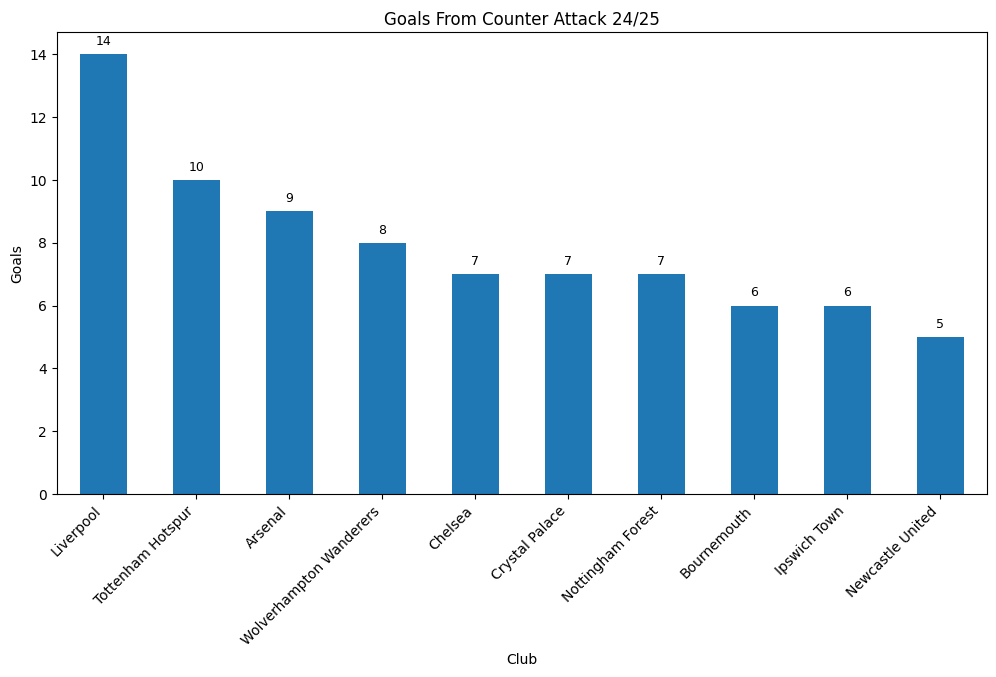

In [13]:
import matplotlib.pyplot as plt

counter_attack = epl.get_club_rankings("goal_fastbreak", season_24_25,"df")
top10 = counter_attack.head(10).sort_values(by="Stat", ascending=False)

plt.figure(figsize=(12, 6))
top10.plot(
    x="Club", 
    y="Stat", 
    kind="bar", 
    title="Goals From Counter Attack 24/25", 
    legend=False,
    ax=plt.gca()
)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Goals")

for i, val in enumerate(top10["Stat"]):
    plt.text(i, val + 0.2, int(val), ha='center', va='bottom', fontsize=9)

``get_club_stats()`` also allows you to specify particular stat types to retrieve only the data you need. To see all available fields that can be queried, use ``get_club_detail_stats()``. This helps you customize your data requests and focus on the most relevant statistics for your analysis.

In [14]:
club_single_all_stat_types = epl.get_club_detail_stats()
club_single_all_stat_types

Available Statistics for Club Detailed Stats (get_club_details)

Basic Stats:
    1. gameweek
    2. wins
    3. losses
    4. draws
    5. goals
    6. goals_conceded
    7. clean_sheet

Passing:
    1. total_pass
    2. accurate_pass
    3. poss_won_att_3rd
    4. poss_won_mid_3rd
    5. poss_won_def_3rd

Attacking:
    1. total_scoring_att
    2. ontarget_scoring_att
    3. big_chance_created
    4. big_chance_missed
    5. goal_assist
    6. goals_openplay
    7. goal_fastbreak
    8. hit_woodwork

Defending:
    1. saves
    2. interception
    3. tackles
    4. blocked_scoring_att
    5. total_clearance
    6. head_clearance
    7. effective_clearance

Discipline:
    1. yellow_card
    2. total_yel_card
    3. red_card
    4. total_red_card

Attendance:
    1. attendance_average
    2. attendance_highest
    3. attendance_lowest

Usage: epl.get_club_details(club_id, season_id, stat_type='stat_name')


In [15]:
liverpool_hit_woodwork = epl.get_club_details(liverpool_id, season_24_25, stat_type='hit_woodwork')
liverpool_hit_woodwork

22.0

At the same time, you can also put multiple stats in a list to get multiple values ​​at one time.

In [16]:
attacking = ['goals', 'goal_assist', 'total_scoring_att', 'big_chance_created', 'big_chance_missed']
liverpool_attack_stats = epl.get_club_details(liverpool_id, season_24_25, stat_type=attacking)
liverpool_attack_stats

,Stat,Value
0,big_chance_created,112.0
1,big_chance_missed,92.0
2,goal_assist,65.0
3,goals,86.0
4,total_scoring_att,648.0


If the ``stat_type`` is not specified, this function will return all the stats.

In [17]:
liverpool_all_data = epl.get_club_details(club_id=liverpool_id, season_id=season_24_25,output='json')
liverpool_all_data

{'outfielder_block': 97.0,
 'effective_clearance': 693.0,
 'touches': 27171.0,
 'interception': 299.0,
 'total_final_third_passes': 6264.0,
 'aerial_lost': 374.0,
 'fwd_pass': 6234.0,
 'possession_percentage': 2201.0000000000005,
 'blocked_pass': 270.0,
 'poss_lost_ctrl': 4682.0,
 'total_pass': 20109.0,
 'duel_won': 1708.0,
 'interception_won': 299.0,
 'total_long_balls': 1784.0,
 'dispossessed': 350.0,
 'total_fwd_zone_pass': 11960.0,
 'long_pass_own_to_opp': 2283.0,
 'final_third_entries': 2309.0,
 'poss_won_mid_3rd': 746.0,
 'open_play_pass': 19317.0,
 'put_through': 599.0,
 'total_back_zone_pass': 8878.0,
 'accurate_back_zone_pass': 8191.0,
 'accurate_fwd_zone_pass': 9332.0,
 'backward_pass': 3137.0,
 'total_throws': 682.0,
 'total_cross_nocorner': 511.0,
 'aerial_won': 409.0,
 'total_launches': 541.0,
 'pen_area_entries': 1300.0,
 'total_cross': 729.0,
 'ball_recovery': 1857.0,
 'duel_lost': 1763.0,
 'poss_lost_all': 4682.0,
 'rightside_pass': 5552.0,
 'long_pass_own_to_opp_succes

## Player Data

There are multiple ways to access player data:

1. `get_player_list()` - Complete squad list for a club
2. `get_player_rankings()` - League-wide player rankings by specific metrics
3. `search_player_by_name()` - Search players using partial or full names
4. `get_player_id()` - Get player ID using full name (recommended for precise matching)
5. `get_player_stats()` - Detailed individual player statistics

**Important Note**: When searching for players, using full names with `get_player_id()` is recommended to avoid ambiguity. The `search_player_by_name()` function supports partial matches but may return multiple results.

First, let's use ``get_player_list()`` to retrieve the squad list for a given club and season.

In [18]:
player_list = epl.get_player_list(season_id=season_24_25, club_id=1)
player_list

,ID,Name,Position,Current Team,Nationality
0,51479,Nathan Butler-Oyedeji,F,Arsenal,England
1,69914,Riccardo Calafiori,D,Arsenal,Italy
2,19680,Gabriel Jesus,F,Arsenal,Brazil
3,50234,Gabriel Magalhães,D,Arsenal,Brazil
4,20810,Kai Havertz,F,Arsenal,Germany
5,5682,Jorginho,M,Arsenal,Italy
6,109478,Jakub Kiwior,D,Arsenal,Poland
7,19778,Mikel Merino,M,Arsenal,Spain
8,6593,Neto,G,Arsenal,Brazil
9,4936,Thomas Partey,M,Arsenal,Ghana


There is a wealth of statistics about players, and we can use ``get_player_ranking_stats()`` to see what data has been recorded.

In [19]:
# This dictionary is collated by LLM and does not ensure that all fields are valid
player_stat_types = epl.get_player_ranking_stats()
player_stat_types

Available Statistics for Player Rankings (get_player_rankings)

General:
    1. appearances
    2. wins
    3. losses
    4. draws
    5. mins_played

Attack:
    1. goals
    2. goal_assist
    3. total_scoring_att
    4. ontarget_scoring_att
    5. hit_woodwork
    6. big_chance_created
    7. big_chance_missed
    8. att_pen_goal
    9. att_freekick_goal
   10. att_hd_goal
   11. att_ibox_goal
   12. att_obox_goal
   13. total_offside
   14. oal_fastbreak
   15. corner_taken

Teamplay:
    1. total_pass
    2. pass_success
    3. total_cross
    4. cross_accuracy
    5. total_through_ball
    6. total_long_balls
    7. touches
    8. key_passes

Defence:
    1. clean_sheet
    2. goals_conceded
    3. tackle_success
    4. last_man_tackle
    5. blocked_scoring_att
    6. interception
    7. clearance_off_line
    8. recoveries
    9. duel_won
   10. duel_lost
   11. aerial_won
   12. aerial_lost
   13. own_goals
   14. penalty_conceded

Discipline:
    1. yellow_card
    2. red_car

Once the ``stat_type`` is clear, we can use ``player_rankings()`` to quickly get player rankings on a particular metric. Here are some examples.

In [20]:
goals_ranking = epl.get_player_rankings(stat_type = "goals", season_id = season_24_25)
goals_ranking.head(10)

,Rank,Player,Club,Stat,Nationality
0,1.0,Mohamed Salah,Liverpool,29.0,Egypt
1,2.0,Alexander Isak,Newcastle United,23.0,Sweden
2,3.0,Erling Haaland,Manchester City,22.0,Norway
3,4.0,Bryan Mbeumo,Brentford,20.0,Cameroon
4,4.0,Chris Wood,Nottingham Forest,20.0,New Zealand
5,6.0,Yoane Wissa,Brentford,19.0,DR Congo
6,7.0,Ollie Watkins,Aston Villa,16.0,England
7,8.0,Cole Palmer,Chelsea,15.0,England
8,8.0,Matheus Cunha,Wolverhampton Wanderers,15.0,Brazil
9,10.0,Jean-Philippe Mateta,Crystal Palace,14.0,France


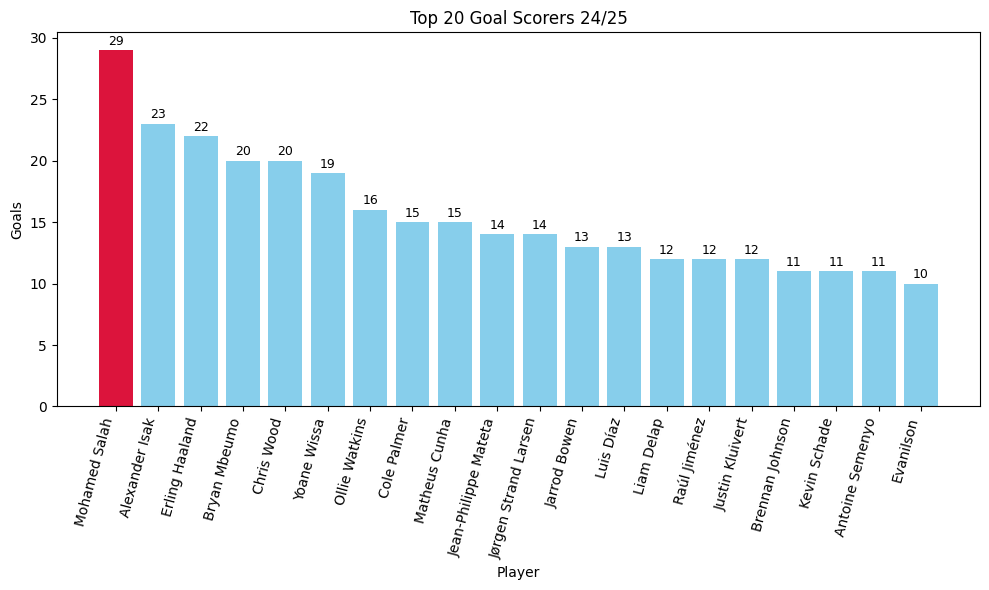

In [21]:
goals_ranking = goals_ranking.head(20)
highlight_name = goals_ranking.iloc[0]["Player"]
highlight_index = goals_ranking[goals_ranking["Player"].str.contains(highlight_name, case=False)].index
colors = ["crimson" if i in highlight_index else "skyblue" for i in range(len(goals_ranking))]
plt.figure(figsize=(10, 6))
bars = plt.bar(goals_ranking["Player"], goals_ranking["Stat"], color=colors)


plt.xticks(rotation=75, ha='right')
plt.title("Top 20 Goal Scorers 24/25")
plt.xlabel("Player")
plt.ylabel("Goals")
for i, val in enumerate(goals_ranking["Stat"]):
    plt.text(i, val + 0.2, int(val), ha='center', va='bottom', fontsize=9)
plt.tight_layout()

In [22]:
big_chance_created = epl.get_player_rankings("att_hd_goal", season_24_25, output = 'json')
big_chance_created

[{'Rank': 1.0,
  'Player': 'Chris Wood',
  'Club': 'Nottingham Forest',
  'Stat': 8.0,
  'Nationality': 'New Zealand'},
 {'Rank': 2.0,
  'Player': 'Erling Haaland',
  'Club': 'Manchester City',
  'Stat': 4.0,
  'Nationality': 'Norway'},
 {'Rank': 2.0,
  'Player': 'Alexander Isak',
  'Club': 'Newcastle United',
  'Stat': 4.0,
  'Nationality': 'Sweden'},
 {'Rank': 2.0,
  'Player': 'Mikel Merino',
  'Club': 'Arsenal',
  'Stat': 4.0,
  'Nationality': 'Spain'},
 {'Rank': 2.0,
  'Player': 'Kevin Schade',
  'Club': 'Brentford',
  'Stat': 4.0,
  'Nationality': 'Germany'},
 {'Rank': 2.0,
  'Player': 'Ollie Watkins',
  'Club': 'Aston Villa',
  'Stat': 4.0,
  'Nationality': 'England'},
 {'Rank': 2.0,
  'Player': 'Yoane Wissa',
  'Club': 'Brentford',
  'Stat': 4.0,
  'Nationality': 'DR Congo'},
 {'Rank': 8.0,
  'Player': 'Richarlison',
  'Club': 'Tottenham Hotspur',
  'Stat': 3.0,
  'Nationality': 'Brazil'},
 {'Rank': 8.0,
  'Player': 'Gabriel Magalhães',
  'Club': 'Arsenal',
  'Stat': 3.0,
  'Nat

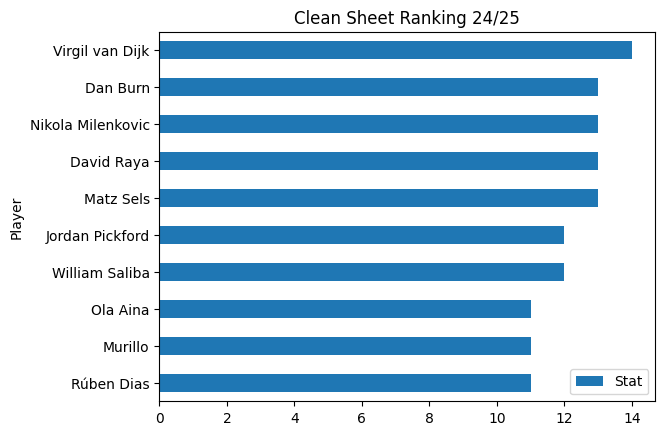

In [23]:
clean_sheet = epl.get_player_rankings("clean_sheet", season_24_25)
clean_sheet.head(10).plot(x="Player", y="Stat", kind="barh", title="Clean Sheet Ranking 24/25")
plt.gca().invert_yaxis()

But how do we get more detailed data about individual? 

Still the same, we need to specify the ``player_id`` of the player first. We can use ``player_search_by_name()`` to find a player (or players).

In [24]:
search_result_1 = epl.search_player_by_name("Kerkez", season_24_25)
search_result_1

,ID,Name,Position,Current Team,Nationality
0,116665,Milos Kerkez,D,Bournemouth,Hungary


Let's try a more "popular" name.

In [25]:
search_result_2 = epl.search_player_by_name("James", season_24_25)
search_result_2

,ID,Name,Position,Current Team,Nationality
0,10565,James Bree,D,Southampton,England
1,14571,Reece James,D,Chelsea,England
2,8456,James Maddison,M,Tottenham Hotspur,England
3,2100,James Milner,M,Brighton & Hove Albion,England
4,8143,James Tarkowski,D,Everton,England


As you can see, this method does not require the player's full name. Even if we're not sure of the player's full name, it can still be confirmed by their position, current team and nationality.

We can also use ``player_id()`` to get the data quickly if we know who we're looking for. It is recommended to enter the full name of the player to avoid confusion in this case.

In [26]:
mo_id = epl.get_player_id("Mohamed Salah", season_24_25)
mo_id

'5178'

Afterwards, we can use ``get_player_stats()`` to get the details of the specified player.

In [27]:
mo_stats = epl.get_player_details(mo_id, season_24_25)
mo_stats

{'entity': {'playerId': 47184.0,
  'info': {'position': 'F',
   'shirtNum': 11.0,
   'positionInfo': 'Left/Centre/Right Winger',
   'loan': False},
  'nationalTeam': {'isoCode': 'EG', 'country': 'Egypt', 'demonym': 'Egyptian'},
  'birth': {'date': {'millis': 708566400000.0, 'label': '15 June 1992'},
   'country': {'isoCode': 'EG', 'country': 'Egypt', 'demonym': 'Egyptian'},
   'place': 'Nagrig'},
  'age': '33 years 1 day',
  'name': {'display': 'Mohamed Salah',
   'first': 'Mohamed',
   'last': 'Salah Hamed Mahrous Ghaly'},
  'id': 5178.0},
 'stats': [{'name': 'appearances',
   'value': 38.0,
   'description': 'Todo: appearances',
   'additionalInfo': {}},
  {'name': 'game_started',
   'value': 38.0,
   'description': 'Todo: game_started',
   'additionalInfo': {}},
  {'name': 'winning_goal',
   'value': 9.0,
   'description': 'Todo: winning_goal',
   'additionalInfo': {}},
  {'name': 'times_tackled',
   'value': 139.0,
   'description': 'Todo: times_tackled',
   'additionalInfo': {}},


Unfortunately, this library does not provide a method similar to ``get_player_ranking_stats()`` or ``get_club_detail_stats()`` to query available player stats types. 

The reason is that on the one hand, the number of player-related stats types is too large, and on the other hand, each player's stats types have certainn differences, with some players having as many as 700+ statistics, while some players like goalkeepers only have 300+ statistics.

In [28]:
entity = mo_stats['entity']
stats_list = mo_stats['stats']

stats_dict = {stat['name']: stat['value'] for stat in stats_list}

player_summary = {
    "name": entity['name']['display'],
    "position": entity['info']['position'],
    "shirt number": entity['info'].get('shirtNum'),
    "age": entity.get('age'),
    "appearances": stats_dict.get('appearances'),
    "goals": stats_dict.get('goals'),
    "goal assist": stats_dict.get('goal_assist')
}

df_player = pd.DataFrame([player_summary])
df_player

,name,position,shirt number,age,appearances,goals,goal assist
0,Mohamed Salah,F,11.0,33 years 1 day,38.0,29.0,18.0


Using ```get_player_comparison()``` can show you the comparison between players. You need to pass the names of the players to be compared as a list. Again, fuzzy search is supported but not recommended.

In [29]:
players_to_compare = ["Andy Robertson", "Milos Kerkez", "Robinson"]

compare_df = epl.get_player_comparison(players_to_compare, season_24_25) 
compare_df

,Position,Team,appearances,mins_played,goals,goal_assist
Player,,,,,,
Andy Robertson,D,Liverpool,33.0,2492.0,0.0,1.0
Milos Kerkez,D,Bournemouth,38.0,3342.0,2.0,5.0
Antonee Robinson,D,Fulham,36.0,3167.0,0.0,10.0


When no stats is specified, the default displayed stats is ```appearances```, ```mins_played```	```goals``` and ```goal_assist```. The `` Position`` and ``Team`` information are fixed anyway.

Also, you can specify the stats you want to compare. Like what we did at the player part, we need to make it clear through a list.


In [30]:
players_to_compare = ["Andy Robertson", "Milos Kerkez", "Robinson"]
stats_to_compare = ["interception", "duel_won", "duel_lost", "ball_recovery", "total_cross", "accurate_cross", "big_chance_created"]

compare_df = epl.get_player_comparison(players_to_compare, season_24_25, stats_to_compare) 
compare_df

,Position,Team,interception,duel_won,duel_lost,ball_recovery,total_cross,accurate_cross,big_chance_created
Player,,,,,,,,,
Andy Robertson,D,Liverpool,21.0,61.0,67.0,105.0,147.0,34.0,7.0
Milos Kerkez,D,Bournemouth,46.0,152.0,132.0,169.0,142.0,39.0,8.0
Antonee Robinson,D,Fulham,62.0,203.0,161.0,157.0,170.0,42.0,6.0


Then, let's organize our data a little bit.

In [31]:
# Calculate success rates and update DataFrame
compare_df['duel_success_rate'] = (compare_df['duel_won'] / (compare_df['duel_won'] + compare_df['duel_lost'])).round(3)
compare_df['cross_success_rate'] = (compare_df['accurate_cross'] / compare_df['total_cross']).round(3)

# Drop original columns
compare_df = compare_df.drop(['duel_won', 'duel_lost', 'total_cross', 'accurate_cross'], axis=1)

# Reorder columns to keep related stats together
columns_order = ['interception', 'ball_recovery', 'duel_success_rate', 'cross_success_rate', 'big_chance_created']
compare_df = compare_df[columns_order]
compare_df.columns = [col.replace('_', ' ').title() for col in compare_df.columns]

compare_df

,Interception,Ball Recovery,Duel Success Rate,Cross Success Rate,Big Chance Created
Player,,,,,
Andy Robertson,21.0,105.0,0.477,0.231,7.0
Milos Kerkez,46.0,169.0,0.535,0.275,8.0
Antonee Robinson,62.0,157.0,0.558,0.247,6.0


Sadly, things like ``Duel Success Rate`` or ``Cross Success Rate`` has to be calculate manually.

Based on these, we can make a cool rader chart :)

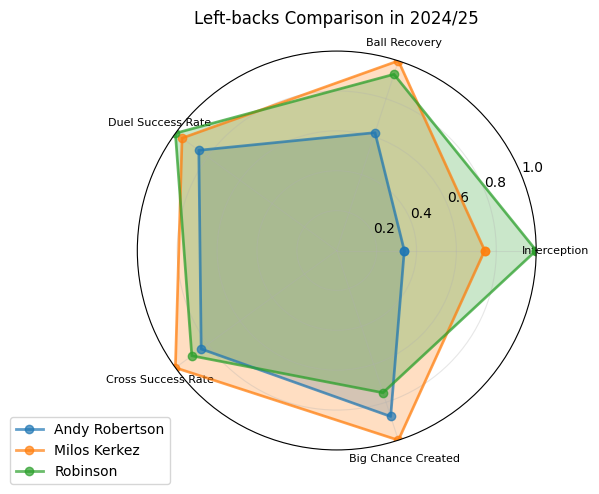

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Max normalization
def normalize_series(series):
    return series / series.max()

normalized_df = compare_df.apply(normalize_series)

categories = normalized_df.columns
num_vars = len(categories)

angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='polar'))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for idx, player in enumerate(players_to_compare):
    values = normalized_df.iloc[idx].values.tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=player, color=colors[idx], alpha=0.7)
    ax.fill(angles, values, alpha=0.25, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=8)

ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Left-backs Comparison in 2024/25", pad=20)

plt.tight_layout() 
plt.show()

## More

There are other things worth exploring, such as trying to change the configuration in ``config.yaml`` to get information about other levels of English competitions (this feature has not been tested yet).